In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Design and Training

## Sequential vs Batch Training
### Sequential Training
From the previous chapter, we fed the input in one at a time and performed backpropagation after each input.
This means that if we have N input in our training set, we need to update the weights N times for each epoch.
This may be the cause of slow learning of the model

### Batch Training
Suppose we were to feed all the input into the network and obtain an error $E(i)$ for each of the input.
Then we average the error ($E_{avg} = \frac{1}{N}\sum E(i)$).
Afterwords, we use this averaged error for gradient calculation used in backpropagation.
The gradient will simply be 

$$
\frac{\partial E_{avg}}{\partial w} = \frac{1}{N}\sum \frac{\partial E(i)}{\partial w}
$$

With this, we only perform weight update only once for each epoch.

### Noise
#### Gradient Estimation
In sequential training, the model is trying to reduce the error for each sample; compared to batch training, where the model is trying to reduce the average error across the sample.
Thus, we can say that the gradient calculated in sequential training is a noisy estimate of the true gradient that we desire.
Because our goal is to ultimately ensure that the model is able to perform well for all samples, using batch training may achieve this goal more closely.

#### Local Minima
However, sequential training may obtain a better solution than the batch training because batch training may be stuck in a local minima. 
Sequential training can alleviate this by using the noise to its advantage, which can help the model escape the local minima to find a better solution.

#### Convergence
At the same time, because of the noise, sequential training will not converge while batch training will converge.
To help prevent the error from fluctuating too wildly near the end of the training session, we can reduce the learning rate over time. (This is similar to the idea of [Simulated Annealing](../ai/local_search.ipynb#simulated_annealing))

#### Second Order Method
Since we require the learning rate to be very small in order to fulfil our assumption of the gradient derived from the first order Taylor expansion, this also lead to slow learning.

When using batch learning, we can calculate the second order expansion of the error function.

$$
E(\vec w(n+1))= E(\vec w(n) + \Delta \vec w(n)) \approx E(\vec w(n)) + \vec g^T(n)\Delta \vec w(n)+ \frac{1}{2}\Delta \vec w^T(n)H(n)\Delta \vec w(n)
$$


$$
\frac{\partial{E(\Delta \vec w(n+1))}}{\partial \vec w(n)}= \vec g^T(n)+ \Delta \vec w^T (n)H(n)
$$

$$
\frac{\partial{E(\Delta \vec w(n+1))}}{\partial \vec w(n)}= 0 \Rightarrow \Delta \vec w (n) = -H^{-1}(n) \vec g(n)
$$

Where H(n) is the Hessian matrix $= \frac{\partial^2{E(w)}}{\partial w^2}$

To compute the Hessian, we can use a given algorithm depending on the size of our network
* For small number of weights, we can use Newton and Gauss-Newton algorithms or Levenberg-Marquardt algorithms.
    * The memory required is $O(W^2)$
* For moderate number of weights, we can use quasi-Newton algorithms.
    * The memory required is $O(W^2)$
* For large number of weights, we can use conjugate-gradient algorithms.
    * The memory required is $O(W)$
    
This means we can jump to somewhere close the minima in one step rather than inching towards it using gradient descent.

Thus, if we are using batch training, we can achieve convergence faster.

Note that if we used second order method with sequential training, we will find the minima with respect to the current input, which does not achieve our goal of finding the minima across all the sample.

## Input Normalization
Consider the problem of classifying the age of the dog, given the breed, size, weight and gender.

Our input would be in the range of 
* Size: 30cm - 100cm
* Weight: 5kg - 30kg
* Gender: 0 for male, 1 for female

Now suppose the dog that we are interested in have the following parameters:
* Size: 60cm
* Weight: 30kg
* Gender: 0

From the model's point of view, the size seems like the most distinctive feature of the dog.
However, 60cm is around the mean of the dog size, while the most distinctive feature of the dog is actually its weight.

Thus, we should normalize our input so that our model knows the range of each parameter intrinsically.

### Choice of Range
We can either normalize the range of our input such that it is from \[0,1\] or \[-1, 1\]

During backpropagation, we know that

$$
\Delta \vec w(n) = \eta \vec \delta(n) \vec x(n)
$$

Notice that if all $\vec x(n)$ is positive, then every weight of a specific neuron will be adjusted in the same direction because $\vec \delta(n)$ is the same for every weight.
Thus, our weights can only be updated in one direction at a time.
Hence, we would want the range to be \[-1, 1\] to give freedom to the weights to be adjusted in different directions.


### Choice of Scale
By similar logic, we would want the scale of each parameter to be similar, so that the weights are updated by a similar scale.

Thus, a simple way to normalize the input would be

$$
\begin{align*}
\bar x_i &= \frac{\sum x_i }{N} &     \sigma_i &= \sqrt{\frac{\sum (x_i - \bar x_i)^2}{N}}  &  x'_i&=\frac{x_i - \bar x_i}{\sigma_i}\\
\end{align*}
$$

## Choice of Activation Function
### Hidden Layer
By the same logic as the choice of range, we would desire the activation function for the hidden layer to be hyperbolic tangent function so that the range of output is \[-1, 1\] also.

### Output Layer
The choice of activation function for the output layer will depend on the problem that we are trying to solve.
Depending on the range of the result of the problem, we can use:
* logistic sigmoid for \[0, 1\]
* hyperbolic tangent for \[-1, 1\]
* linear for regression

## Generalization
When a network generalize well, it should produce output that are close to being correct for some test input that it has never seen before.

**Factors affecting generalization**
* Size of training set
* Accuracy of training labels
* Architecture of network
* Training process

### Overfitting
Overfitting is a sign of bad generalization, where the network has enough "power" to reduce the error without generalizing.

### Empirical Condition
For good generalization, we should satisfy the following empirical condition:

The size of the training set should be $x$ times the number of free parameters in the network, where $x$ is $\frac{1}{\text{error amount}}$

Thus, if we wish to have a 10% error for the test set, we would need a training set of size $\frac{1}{10\%} = 10$ times the number of free parameters.

However, for most applications, we may not have enough training data to satisfy this condition.

Hence, a good rule of thumb to have good generalization, we should aim to have:
* Regularization
* Minimal network structure

### Regularization
Notice that for the one dimensional case, overfitting occurs when there are regions of high gradients in the output.
This correspond to high gradients in some of the building blocks of the network.
Thus, we can correlate high gradients to overfitting.
Since gradient is simply the product of the weights, we can use the size of the weights as a indication of how well our model is generalizing.

Thus, we can regularize our cost function by incorporating a cost on the weights of the network also

$$
F = E_D + \lambda E_w
$$

where $F$ is the new cost function, $E_D$ is the error on the training data and $E_w$ is the cost on the weights.

In the past, weight decay is used, where 
$$
E_w = (b^{(2)})^2 + \sum((w_i^{(1)})^2+(w_i^{(2)})^2+(b_i^{(1)})^2)
$$

More recently, weight elimination is used, where 
$$
E_w = \sum(w_i^{(1)}w_i^{(2)})^2
$$

since we know that gradient of the building block solely depends on the product of the weights.

## Finding Minimal Structure <a id = "hidden-neuron"></a>
We can determine the number of hidden neurons/layer using trial and error, by: 
* network growing: start with a small network and add neurons/layers until we can solve the problem
* network pruning: start with a large network and remove neurons/layers until we cannot solve the problem

However, we wish to find a more empirical approach to choosing the number of hidden units needed.


### Geometric Analysis
Suppose we have a (1-1-1) multilayer perceptron, using the piecewise linear as the activation function of the hidden layer and linear for the output layer.

We now consider the effects on the ouput when we vary the weights.
Suppose we call this the **building block** for this network.

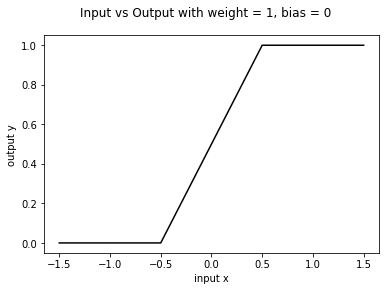

In [2]:
from module.mlp import MLP
from module.activation_function import PiecewiseLinear, Linear

mlp = MLP((1,1,1))
mlp.neurons[1][0].activation_function = PiecewiseLinear()
mlp.neurons[1][0].weights = np.array([0, 1])

mlp.neurons[2][0].activation_function = Linear()
mlp.neurons[2][0].weights = np.array([0, 1])

fig, ax = plt.subplots(1, 1)

xs = np.linspace(-1.5, 1.5, 100)
inputs = np.array([[x] for x in xs])
ys = [mlp.get_outputs(i) for i in inputs]

plt.plot(xs, ys, '-k')
ax.set_xlabel("input x")
ax.set_ylabel("output y")
fig.suptitle('Input vs Output with weight = 1, bias = 0', fontsize=12)
plt.show()


Notice that when we change the weight and bias, the follow graph materializes:

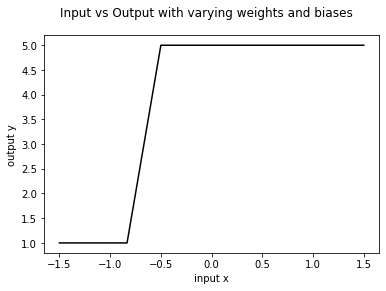

In [3]:
mlp = MLP((1,1,1))
mlp.neurons[1][0].activation_function = PiecewiseLinear()
mlp.neurons[1][0].weights = np.array([2, 3])

mlp.neurons[2][0].activation_function = Linear()
mlp.neurons[2][0].weights = np.array([1, 4])

fig, ax = plt.subplots(1, 1)

xs = np.linspace(-1.5, 1.5, 100)
inputs = np.array([[x] for x in xs])
ys = [mlp.get_outputs(i) for i in inputs]

plt.plot(xs, ys, '-k')
ax.set_xlabel("input x")
ax.set_ylabel("output y")
fig.suptitle('Input vs Output with varying weights and biases', fontsize=12)
plt.show()


Notice a few properties of the new graph.

* $b_1, w_1 = 2,3$
* $b_2, w_2 = 1,4$
* Height of building block $= 5 - 1 = 4 = w_2$
* Width of building block $ \approx 0.333 \approx \frac{1}{w_1}$
* Center of the block $\approx -0.667 \approx -\frac{b_1}{w_1}$
* Gradient of the block $ = 12 = w_1 w_2$
* y offset $= 1 = b_2$

Indeed, we can prove each property is indeed the values on the right hand side for any possible weights and biases.

Now suppose we wish to approximate the function with the following shape

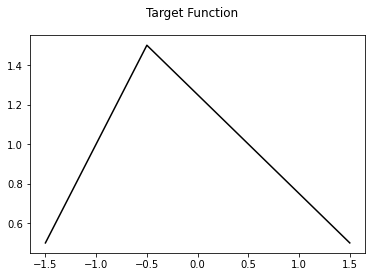

In [4]:
fig, ax = plt.subplots(1, 1)

xs = np.linspace(-1.5, 1.5, 100)
ys = np.where(xs < -0.5, xs+2, 1.25 - xs/2)

plt.plot(xs, ys, '-k')
fig.suptitle('Target Function', fontsize=12)
plt.show()

Notice that each building block contribute to one "slope side" of the function.
Thus, we know that we can approximate this shape using a multilayer perceptron of size (1,2,1), since the output is simply the sum of the building blocks.

y_offset = 0.5
slope = 1
center = -1
width = 1

y_offset 0.5
slop = -1/2
center = 0.5
width = 2


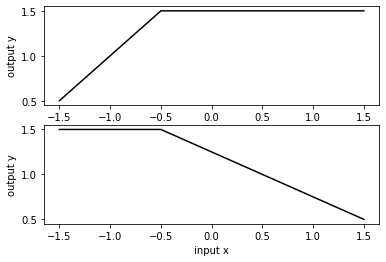

In [5]:
mlp = MLP((1,1,1))
mlp.neurons[1][0].activation_function = PiecewiseLinear()
mlp.neurons[1][0].weights = np.array([1, 1])

mlp.neurons[2][0].activation_function = Linear()
mlp.neurons[2][0].weights = np.array([0.5, 1])

fig, axs = plt.subplots(2)

xs = np.linspace(-1.5, 1.5, 100)
inputs = np.array([[x] for x in xs])
ys = [mlp.get_outputs(i) for i in inputs]

axs[0].plot(xs, ys, '-k')
axs[0].set_xlabel("input x")
axs[0].set_ylabel("output y")

mlp = MLP((1,1,1))
mlp.neurons[1][0].activation_function = PiecewiseLinear()
mlp.neurons[1][0].weights = np.array([0.25, -0.5])

mlp.neurons[2][0].activation_function = Linear()
mlp.neurons[2][0].weights = np.array([0.5, 1])

xs = np.linspace(-1.5, 1.5, 100)
inputs = np.array([[x] for x in xs])
ys = [mlp.get_outputs(i) for i in inputs]

axs[1].plot(xs, ys, '-k')
axs[1].set_xlabel("input x")
axs[1].set_ylabel("output y")
plt.show()

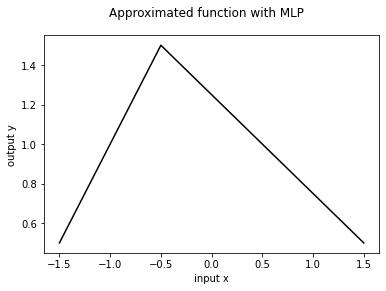

In [6]:
mlp = MLP((1,2,1))
mlp.neurons[1][0].activation_function = PiecewiseLinear()
mlp.neurons[1][0].weights = np.array([1, 1])

mlp.neurons[1][1].activation_function = PiecewiseLinear()
mlp.neurons[1][1].weights = np.array([0.25, -0.5])

mlp.neurons[2][0].activation_function = Linear()
mlp.neurons[2][0].weights = np.array([-0.5, 1, 1])

fig, ax = plt.subplots(1, 1)

xs = np.linspace(-1.5, 1.5, 100)
inputs = np.array([[x] for x in xs])
ys = [mlp.get_outputs(i) for i in inputs]

plt.plot(xs, ys, '-k')
ax.set_xlabel("input x")
ax.set_ylabel("output y")
fig.suptitle('Approximated function with MLP', fontsize=12)
plt.show()


Thus indeed, our MLP can approximate and function, and we get a geometric understanding of the weights and biases.

Thus, given any continuous function, we can estimate the number of hidden neurons needed by determining the minimum number of building blocks required to estimate the function.

For higher dimensions, our building blocks will be planes or hyperplanes.

And if we use another activation function, our building blocks may be smooth instead of flat.
This can allow for better approximation of smooth functions.

---

Since choosing the determining the number of building blocks needed for a high dimensional problem is difficult, we face problems finding the minimal structure for our network for higher dimensional problems.

---

## Determining Minimal Structure for High Dimensions
### Finding Redundant Neurons
Suppose in our network, there is two neurons whose outputs are linearly dependent on each other.
This means that we can actually eliminate one of the neuron and incorporate its weights into the other.

Suppose we want to find the redundant hidden neurons in the network.

One way to find it is to look at the output of every hidden neuron, that is:

$$
h_{ki} = \varphi_i(w_i x + b_i) \in H
$$

This will result in $H_{N \times n}$, where N is the number of input sample while n is the number of hidden neurons.

Thus, now our aim is to find all potentially redundant neurons in the network.

### Singular Value Decomposition
We can factorize the matrix using SVD, which will result in:

$$
H_{N \times n} =  U_{N \times N}\Sigma_{N \times n}V^T_{n \times n}
$$

where U and V are orthogonal and 

$$
\Sigma_{N \times n} = 
\begin{pmatrix}
\sigma_1 & 0 & \cdots & 0  & \cdots & 0\\
0 & \sigma_2 & \cdots & 0 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots & \ddots & 0\\
0 & 0 & \cdots & \sigma_k & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots & \ddots & 0\\
0 & 0 & 0 & 0 & \cdots & 0\\
\end{pmatrix}
$$

An interesting property of $\Sigma$ is that it holds the effective rank of the columns, where $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_k$.

#### Numerical Rank vs Effective Rank
The numerical rank of the matrix is the number of independent rows/columns.
However, this is not very useful to us because two vectors in the matrix may be very similar but still independent.

For example:

$$
\begin{align*}
M_1 = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
\quad
&
M_2 = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 1 & 0.001 \\
\end{pmatrix}
\end{align*}
$$

$M_1$ and $M_2$ are both full rank, but $M_2$ have 2 rows which are very similar to each other.

Thus, what we are interested in is the effective rank of the vectors in the matrix instead.
If we compute the SVD as per below:

In [7]:
import numpy as np

m1 = np.identity(3)
m2 = np.array([[1, 0, 0], [0, 1, 0], [0, 1, 0.001]])

_, s1, _ = np.linalg.svd(m1)
_, s2, _ = np.linalg.svd(m2)
print(s1)
print(s2)

[1. 1. 1.]
[1.41421374e+00 1.00000000e+00 7.07106693e-04]


We see that $\Sigma$ indeed indicates the lack thereof independence between the vectors in $M_2$, as shown by the small magnitude of $\sigma_k$.

### Threshold for $\sigma$
Now, we just need a way to count the number of vectors with significant contribution to the matrix.

However, it is not recommended to use absolute values as all the $\sigma$ may be small.

Thus, we should normalize the $\sigma$ to find those vectors which are significant.

Two common ways are:

$$
\begin{align*}
\min _k \frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^n \sigma_i} \geq \gamma &
\quad
\min _k \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} \geq \gamma 
\end{align*}
$$

where $\gamma$ is the threshold of spectral energy (usually 95% or 99%) and k is the minimum number of vectors needed to reach this threshold.

### Methodology
Thus, we have derived a method to find the minimal structure for the problem

1. Construct a network with many hidden neurons
2. Train the network
3. Compute SVD and find k
4. Construct a network with k hidden neurons
5. Repeat 2-5 until convergence

### Threshold for $\sigma$
Now, we just need a way to count the number of vectors with significant contribution to the matrix.

However, it is not recommended to use absolute values as all the $\sigma$ may be small.

Thus, we should normalize the $\sigma$ to find those vectors which are significant.

Two common ways are:

$$
\begin{align*}
\min _k \frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^n \sigma_i} \geq \gamma &
\quad
\min _k \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} \geq \gamma 
\end{align*}
$$

where $\gamma$ is the threshold of spectral energy (usually 95% or 99%) and k is the minimum number of vectors needed to reach this threshold.

### Methodology
Thus, we have derived a method to find the minimal structure for the problem

1. Construct a network with many hidden neurons
2. Train the network
3. Compute SVD and find k
4. Construct a network with k hidden neurons
5. Repeat 2-5 until convergence

## Number of Hidden Layers
For some problems, we can solve the problem by increasing the number of hidden layers instead of number of hidden neurons.
This may allow us to have a network with less free parameters, and thus better training.
A general guideline is that, if the problem can be decomposed into smaller subproblems, then introducing more hidden layers may be a good strategy.

However, it is to note that **increasing number of hidden layers increases the tendency for the model to be trapped in a local minimum** due to a more complicated structure.